# Single Server Queue Simulation for A Small Grocery Store

## 1. Import Dependencies

In [214]:
import random
from matplotlib import pyplot as plt
import plotly.graph_objects as go

## 2. System Initialization

In [230]:
# Simulating the arrival and departure of customers; Creating a list of 100 customers
no_of_customers = 100

# Creating a list of 100 customers, with a for loop starting from 1
customer_number = [i for i in range(1, no_of_customers + 1)]

# Service times inputs
SERVICE_TIME = [1, 2, 3, 4, 5, 6]
SERVICE_PROBABILITY = [0.10, 0.20, 0.30, 0.25, 0.10, 0.05]

### 2.1 Interarrival Time Generation

In [231]:
# Generating random interarrival times list

def interArrivalTime(no_of_customers):
    # random.randint() generates a random integer numbers between (1, 8), as previously given from 1 to 8 minutes
    interarrival_time = [random.randint(1, 8) for i in range(no_of_customers)]
    
    # Initializing the first customer's arrival time in the list with 0
    interarrival_time[0] = 0
    return interarrival_time

interarrival_time = interArrivalTime(no_of_customers)
print(interarrival_time)

[0, 2, 4, 4, 7, 4, 1, 3, 2, 8, 1, 7, 4, 7, 6, 4, 3, 4, 6, 8, 2, 3, 3, 4, 3, 2, 5, 8, 3, 8, 4, 1, 2, 4, 8, 4, 3, 7, 4, 3, 3, 8, 2, 4, 6, 4, 8, 6, 2, 2, 8, 4, 7, 4, 7, 5, 7, 8, 3, 6, 6, 2, 2, 5, 8, 8, 4, 2, 7, 1, 8, 2, 8, 5, 6, 4, 6, 5, 3, 7, 7, 3, 6, 5, 1, 6, 1, 7, 2, 3, 1, 1, 8, 6, 1, 7, 8, 1, 5, 1]


### 2.2 Arrival Time Calculation

In [232]:
# Calculating the arrival times, by accumulation, and put them in a list using the random interarrival times

def arrivalTimes(interarrival_time, no_of_customers):
    arrival_times = [0 for i in range(no_of_customers)]
    
    for i in range(1, no_of_customers):
        arrival_times[i] = interarrival_time[i] + arrival_times[i-1]
    return arrival_times

arrival_times = arrivalTimes(interarrival_time, no_of_customers)

### 2.3 Service Time Generation

In [233]:
""" 
- Generating random service times list using the given service times and their probabilities
- random.choices() method returns a list with the randomly selected element  
  from the specified sequence (SERVICE_TIME), the possibility for each value (SERVICE_PROBABILITY), 
  and K = the length of the returned list (no_of_customers)
"""
def serviceTime(SERVICE_TIME, SERVICE_PROBABILITY):
    service_times = random.choices(SERVICE_TIME, SERVICE_PROBABILITY, k=100)
    
    return service_times

service_times = serviceTime(SERVICE_TIME, SERVICE_PROBABILITY)
print(service_times)

[2, 3, 4, 5, 3, 4, 5, 4, 2, 4, 6, 4, 3, 2, 2, 6, 3, 3, 3, 4, 3, 2, 5, 3, 4, 2, 4, 3, 3, 4, 2, 6, 2, 2, 4, 5, 4, 3, 4, 4, 4, 4, 3, 3, 6, 3, 2, 3, 3, 1, 5, 6, 5, 4, 2, 3, 6, 3, 3, 2, 4, 6, 4, 5, 5, 4, 1, 2, 4, 4, 4, 2, 2, 4, 3, 2, 4, 3, 3, 4, 5, 6, 1, 2, 5, 4, 5, 1, 1, 5, 3, 2, 4, 1, 1, 1, 2, 5, 1, 2]


### 2.4 Service Time Begins and Ends

In [234]:
time_service_begin = [0 for i in range(no_of_customers)]
time_service_end = [0 for i in range(no_of_customers)]

time_service_begin[0] = arrival_times[0]
time_service_end[0] = service_times[0]

for i in range(1, no_of_customers):
        time_service_begin[i] = max(arrival_times[i], time_service_end[i - 1])
        time_service_end[i] = time_service_begin[i] + service_times[i]

### 2.5 Waiting Time in Queue

In [235]:
def queueTime(arrival_times, time_service_begin, no_of_customers):
    queue_time = [0 for i in range(no_of_customers)]
    
    for i in range(1, no_of_customers):
        queue_time[i] = time_service_begin[i] - arrival_times[i]   
    return queue_time

queue_time = queueTime(arrival_times, time_service_begin, no_of_customers)

### 2.6 Time Customer Spends in System

In [236]:
# Calculating the time spent in the system from the arrival time to the end for every customer

def timeInSystem(arrival_times, service_times_gen, no_of_customers):
    # Initializing the list of the time spent in the system for 100 customers
    time_in_system = [0 for i in range(no_of_customers)]

    # Initializing the first customer to spend only its service time
    time_in_system[0] = service_times_gen[0]

    # Calculating the simulation results
    for i in range(1, no_of_customers):
        time_in_system[i] = time_service_end[i] - arrival_times[i]
    return time_in_system

time_in_system = timeInSystem(arrival_times, service_times, no_of_customers)

### 2.7 Idle Time of the Server

In [237]:
# Calculating the idle time of the server
    
def idle_time(no_of_customers, arrival_times, time_service_end):
    idle_time = [0 for i in range(no_of_customers)]
    
    for i in range(1, no_of_customers):
        if arrival_times[i] > time_service_end[i - 1]:
            idle_time[i] = arrival_times[i] - time_service_end[i - 1]
        else:
            idle_time[i] = 0
    return idle_time

idle_time =  idle_time(no_of_customers, arrival_times, time_service_end)

### 2.8 Total Time Customers Spend In The System

In [238]:
def totalTimeInSystem(arrival_times, service_times, no_of_customers):
    # Initializing the lists of the table 
    total_time_insystem = [0 for i in range(no_of_customers)]

    # Calculating the time for the first customer
    total_time_insystem[0] = service_times[0]

    # Calculating the time for the rest of the customers
    for i in range(1, no_of_customers):
        total_time_insystem[i] = time_service_end[i] - arrival_times[i]

    return total_time_insystem

## 3. Results Visualization In Simulation Table

In [239]:
def plotTable(customer_number, interarrival_time, arrival_times, service_times, time_service_begin, 
               queue_time, time_service_end, time_in_system, idle_time):
    fig = go.Figure(data=[go.Table(
        header=dict(values=['<b>Customer</b>', '<b>Interarrival time (min)</b>', '<b>Arrival time</b>',
                            '<b>Service time (min)</b>', '<b>Time service begins</b>', '<b>Waiting time in queue (min)</b>',
                            '<b>Time service ends</b>', '<b>Time customer spends in system</b>', '<b>Idle time of server</b>'],    
                    line_color='darkslategray',
                    fill_color='lavender',
                    font_size=13,
                    align='center'),
        cells=dict(values=[customer_number, interarrival_time, arrival_times, service_times, 
                           time_service_begin, queue_time, time_service_end, time_in_system, idle_time],
                   line_color='gray',
                   fill_color = [['white','lightgrey','white', 'lightgrey',]*50],
                   align='center'))
    ])

    fig.update_layout(width=1000, height=500)
    fig.show()

plotTable(customer_number, interarrival_time, arrival_times, service_times, time_service_begin, 
               queue_time, time_service_end, time_in_system, idle_time)

## 4. Typical Performance Measures of a Queuing System

In [240]:
# Average waiting time = (total times customers wait in queue)/(total number of customers)
avg_wait_time = sum(queue_time)/no_of_customers

# Probability of waiting = (number of customers who wait)/(total number of customers)
wait_customers = list(filter(lambda x:x>0, queue_time))
no_wait_customers = len(wait_customers)
probability_wait = (no_wait_customers / no_of_customers)

# Probability of idle server = (total idle time of server)/(total runtime of simulation)
probability_idle_server = sum(idle_time) / time_service_end[no_of_customers - 1]

# Average service time = (total service time)/(total number of customers)
avg_service_time = sum(service_times) / no_of_customers

# Average time between arrivals = (sum of interarrival times)/(total number of customers - 1)
avg_interarrival_time = sum(interarrival_time) / (no_of_customers - 1)

# Average waiting time of those who wait = (total time of customers wait in queue)/(total number of customers who wait)
avg_waiting_time = sum(queue_time) / no_wait_customers


# Average time a customer spends in system = (total Time in system)/(total number of customers)
total_time_insystem = totalTimeInSystem(arrival_times, service_times, no_of_customers)
avg_system_time = sum(total_time_insystem) / no_of_customers


print("\n\tTypical Performance Measures of a Queuing System")
print("\t================================================\n")
print("𝐴𝑣𝑒𝑟𝑎𝑔𝑒 𝑊𝑎𝑖𝑡𝑖𝑛𝑔 𝑇𝑖𝑚𝑒 = {:.2f} min".format(avg_wait_time))
print("-----------------------------------------------")
print("𝑃𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦 (𝑤𝑎𝑖𝑡) = {:.2f}".format(probability_wait))
print("-----------------------------------------------")
print("𝑃𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦 𝑖𝑑𝑙𝑒 𝑠𝑒𝑟𝑣𝑒𝑟 = {:.3f} ".format(probability_idle_server))
print("-----------------------------------------------")
print("𝐴𝑣𝑒𝑟𝑎𝑔𝑒 𝑠𝑒𝑟𝑣𝑖𝑐𝑒 𝑡𝑖𝑚𝑒 = {:.2f} min".format(avg_service_time))
print("-----------------------------------------------")
print("𝐴𝑣𝑒𝑟𝑎𝑔𝑒 𝑡𝑖𝑚𝑒 𝑏𝑒𝑡𝑤𝑒𝑒𝑛 𝑎𝑟𝑟𝑖𝑣𝑎𝑙𝑠 = {:.2f} min".format(avg_interarrival_time))
print("-----------------------------------------------")
print("𝐴𝑣𝑒𝑟𝑎𝑔𝑒 𝑤𝑎𝑖𝑡𝑖𝑛𝑔 𝑡𝑖𝑚𝑒 𝑜𝑓 𝑡ℎ𝑜𝑠𝑒 𝑤ℎ𝑜 𝑤𝑎𝑖𝑡 = {:.2f} min".format(avg_waiting_time))
print("-----------------------------------------------")
print("𝐴𝑣𝑒𝑟𝑎𝑔𝑒 𝑡𝑖𝑚𝑒 𝑎 𝑐𝑢𝑠𝑡𝑜𝑚𝑒𝑟 𝑠𝑝𝑒𝑛𝑑𝑠 𝑖𝑛 𝑡ℎ𝑒 𝑠𝑦𝑠𝑡𝑒𝑚= {:.2f} min".format(avg_system_time))


	Typical Performance Measures of a Queuing System

𝐴𝑣𝑒𝑟𝑎𝑔𝑒 𝑊𝑎𝑖𝑡𝑖𝑛𝑔 𝑇𝑖𝑚𝑒 = 1.11 min
-----------------------------------------------
𝑃𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦 (𝑤𝑎𝑖𝑡) = 0.45
-----------------------------------------------
𝑃𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦 𝑖𝑑𝑙𝑒 𝑠𝑒𝑟𝑣𝑒𝑟 = 0.250 
-----------------------------------------------
𝐴𝑣𝑒𝑟𝑎𝑔𝑒 𝑠𝑒𝑟𝑣𝑖𝑐𝑒 𝑡𝑖𝑚𝑒 = 3.39 min
-----------------------------------------------
𝐴𝑣𝑒𝑟𝑎𝑔𝑒 𝑡𝑖𝑚𝑒 𝑏𝑒𝑡𝑤𝑒𝑒𝑛 𝑎𝑟𝑟𝑖𝑣𝑎𝑙𝑠 = 4.54 min
-----------------------------------------------
𝐴𝑣𝑒𝑟𝑎𝑔𝑒 𝑤𝑎𝑖𝑡𝑖𝑛𝑔 𝑡𝑖𝑚𝑒 𝑜𝑓 𝑡ℎ𝑜𝑠𝑒 𝑤ℎ𝑜 𝑤𝑎𝑖𝑡 = 2.47 min
-----------------------------------------------
𝐴𝑣𝑒𝑟𝑎𝑔𝑒 𝑡𝑖𝑚𝑒 𝑎 𝑐𝑢𝑠𝑡𝑜𝑚𝑒𝑟 𝑠𝑝𝑒𝑛𝑑𝑠 𝑖𝑛 𝑡ℎ𝑒 𝑠𝑦𝑠𝑡𝑒𝑚= 4.50 min


## 5. Performance Histograms

### 5.1 Ploting the Frequency of individual customer waiting time

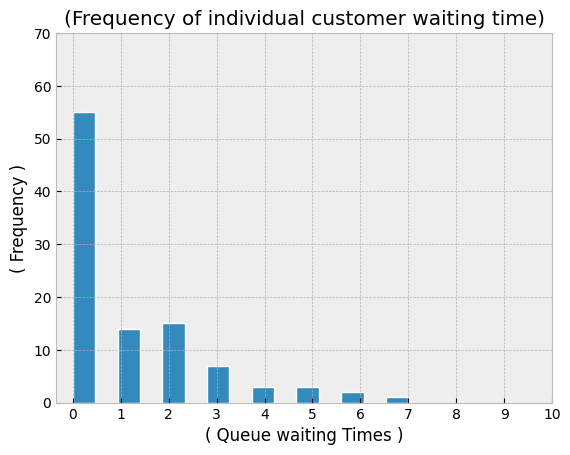

In [241]:
plt.style.use("bmh")
fig, ax = plt.subplots()
ax.hist(queue_time, bins = 15, linewidth = 1.0, align='mid', edgecolor = "white")
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
plt.ylim(0, 70)
plt.xlabel("( Queue waiting Times )")
plt.ylabel("( Frequency )")
plt.title("(Frequency of individual customer waiting time)")
plt.show()

### 5.2 Ploting the average customer waiting

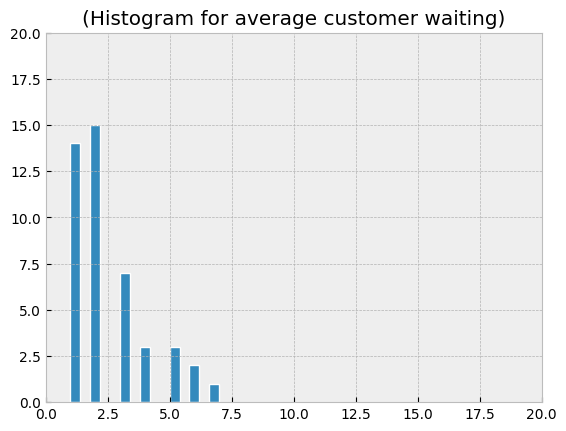

In [242]:
plt.style.use("bmh")
fig, ax = plt.subplots()
ax.hist(wait_customers, bins = 15, linewidth = 1.0, align='mid', edgecolor = "white")
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.title("(Histogram for average customer waiting)")
plt.show()
